In [2]:
import requests
import pandas as pd
import json

# Get the data from the API
response = requests.get("http://api.open-notify.org/astros.json")
data = response.json()

# Convert to DataFrame
df = pd.DataFrame(data['people'])

# Add the total number of people as a column
df['total_people'] = data['number']

# Display the DataFrame
print(df)

       craft                  name  total_people
0        ISS        Oleg Kononenko            12
1        ISS          Nikolai Chub            12
2        ISS  Tracy Caldwell Dyson            12
3        ISS      Matthew Dominick            12
4        ISS       Michael Barratt            12
5        ISS         Jeanette Epps            12
6        ISS   Alexander Grebenkin            12
7        ISS         Butch Wilmore            12
8        ISS       Sunita Williams            12
9   Tiangong            Li Guangsu            12
10  Tiangong               Li Cong            12
11  Tiangong            Ye Guangfu            12


In [6]:
# Basic info
print(df.info())

# Unique spacecraft
print("\nSpacecraft currently in use:")
print(df['craft'].unique())

# Count astronauts per spacecraft
print("\nAstronauts per spacecraft:")
print(df['craft'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   craft         12 non-null     object
 1   name          12 non-null     object
 2   total_people  12 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 420.0+ bytes
None

Spacecraft currently in use:
['ISS' 'Tiangong']

Astronauts per spacecraft:
craft
ISS         9
Tiangong    3
Name: count, dtype: int64


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style('whitegrid')

<ipython-input-8-b88a0e0387f8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=craft_counts.index, y=craft_counts.values, palette='viridis')


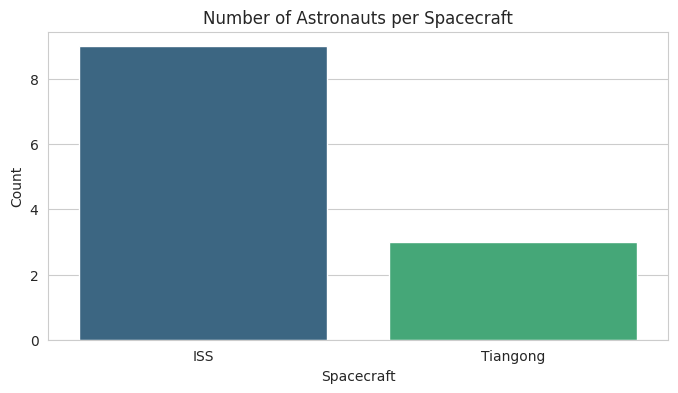

In [8]:
plt.figure(figsize=(8,4))
craft_counts = df['craft'].value_counts()
sns.barplot(x=craft_counts.index, y=craft_counts.values, palette='viridis')
plt.title('Number of Astronauts per Spacecraft')
plt.xlabel('Spacecraft')
plt.ylabel('Count')
plt.show()

In [12]:
import plotly.express as px

fig = px.sunburst(df, path=['craft', 'name'],
                  title='Astronaut Distribution by Spacecraft',
                  color='craft')
fig.show()

In [14]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime

# Get astronauts data (no timestamp available)
astros_response = requests.get("http://api.open-notify.org/astros.json")
astros_data = astros_response.json()
astros_df = pd.DataFrame(astros_data['people'])
astros_df['total_people'] = astros_data['number']

# Get ISS position data (with timestamp)
iss_response = requests.get("http://api.open-notify.org/iss-now.json")
iss_data = iss_response.json()
iss_time = pd.to_datetime(iss_data['timestamp'], unit='s')

# Create DataFrames
iss_df = pd.DataFrame({
    'craft': ['ISS'],
    'latitude': [float(iss_data['iss_position']['latitude'])],
    'longitude': [float(iss_data['iss_position']['longitude'])],
    'position_timestamp': [iss_time]
})

# Merge data for ISS astronauts only
iss_astros = astros_df[astros_df['craft'] == 'ISS'].copy()
combined_df = iss_astros.merge(iss_df, on='craft')

In [15]:
combined_df.head()

,craft,name,total_people,latitude,longitude,position_timestamp
0,ISS,Oleg Kononenko,12,-15.7759,152.3264,2025-04-05 10:16:03
1,ISS,Nikolai Chub,12,-15.7759,152.3264,2025-04-05 10:16:03
2,ISS,Tracy Caldwell Dyson,12,-15.7759,152.3264,2025-04-05 10:16:03
3,ISS,Matthew Dominick,12,-15.7759,152.3264,2025-04-05 10:16:03
4,ISS,Michael Barratt,12,-15.7759,152.3264,2025-04-05 10:16:03


In [16]:
fig = px.scatter_geo(iss_df,
                    lat='latitude',
                    lon='longitude',
                    size=[len(iss_astros) * 100],  # Bubble size based on crew count
                    projection='natural earth',
                    title=f'ISS Position with {len(iss_astros)} Crew Members (Updated {iss_time.strftime("%Y-%m-%d %H:%M:%S")})',
                    hover_name='craft')
fig.update_geos(showland=True, landcolor="lightgray")
fig.show()

In [18]:
!pip install astral


In [19]:
from astral import LocationInfo
from astral.sun import sun
import pytz

city = LocationInfo("ISS", "Orbit", "UTC",
                   iss_df['latitude'].iloc[0],
                   iss_df['longitude'].iloc[0])

try:
    s = sun(city.observer, date=iss_time.date(), tzinfo=pytz.UTC)
    sunrise = s['sunrise']
    sunset = s['sunset']

    if sunrise < iss_time.time() < sunset:
        print("ISS is currently in daylight")
    else:
        print("ISS is currently in darkness")
except:
    print("Could not calculate day/night status (possibly polar day/night)")

Could not calculate day/night status (possibly polar day/night)
